# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [2]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [3]:
df['Deck'] = df['Cabin'].str[0]
df = df.drop('Cabin', axis=1)
print(df['Deck'].head(30))

0     NaN
1       C
2     NaN
3       C
4     NaN
5     NaN
6       E
7     NaN
8     NaN
9     NaN
10      G
11      C
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21      D
22    NaN
23      A
24    NaN
25    NaN
26    NaN
27      C
28    NaN
29    NaN
Name: Deck, dtype: object


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [4]:
cate_cols = ['Sex', 'Embarked', 'Deck']
for col in cate_cols:
    df[col] = pd.Categorical(df[col]).codes

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [5]:
continuous_cols = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Deck']

for col in continuous_cols:
    df[col] = df[col].fillna(df[col].mean())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [6]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [7]:
import json
df.to_csv('titanic_done.csv')
data = df.to_dict('records')
with open('titanic_done.json', 'w') as f:
    json.dump(data, f, indent=4)

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [8]:
cate_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Deck']
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

for col in cate_cols:
    print(f"{col} mode: {df[col].mode()[0]}")
for col in num_cols:
    print(f"{col} median: {df[col].median()}")

Survived mode: 0
Pclass mode: 3
Sex mode: 1
Embarked mode: 2
Deck mode: -1
Age median: 29.69911764705882
SibSp median: 0.0
Parch median: 0.0
Fare median: 14.4542


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [9]:
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

average_survivor = {}
average_non_survivor = {}

for col in cate_cols:
    if col != 'Survived':
        average_survivor[col] = survivors[col].mode()[0]
        average_non_survivor[col] = non_survivors[col].mode()[0]

for col in num_cols:
    average_survivor[col] = survivors[col].median()
    average_non_survivor[col] = non_survivors[col].median()

print("average survivor be like:", average_survivor)
print("average non-survivor be like:", average_non_survivor)

average survivor be like: {'Pclass': np.int64(1), 'Sex': np.int8(0), 'Embarked': np.int8(2), 'Deck': np.int8(-1), 'Age': np.float64(29.69911764705882), 'SibSp': np.float64(0.0), 'Parch': np.float64(0.0), 'Fare': np.float64(26.0)}
average non-survivor be like: {'Pclass': np.int64(3), 'Sex': np.int8(1), 'Embarked': np.int8(2), 'Deck': np.int8(-1), 'Age': np.float64(29.69911764705882), 'SibSp': np.float64(0.0), 'Parch': np.float64(0.0), 'Fare': np.float64(10.5)}


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

In [ ]:
print("Survivor group:")
for col in ['Pclass', 'Sex', 'Embarked', 'Deck']:
    print(f"{col} distribution:")
    print(survivors[col].value_counts().head(3))
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    print(f"{col}: mean={survivors[col].mean():.2f}, std={survivors[col].std():.2f}")
print("\nNon-survivor group:")
for col in ['Pclass', 'Sex', 'Embarked', 'Deck']:
    print(f"{col} distribution:")
    print(non_survivors[col].value_counts().head(3))
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    print(f"{col}: mean={non_survivors[col].mean():.2f}, std={non_survivors[col].std():.2f}")

survivor_idx = survivors[num_cols].sub([average_survivor[col] for col in num_cols]).abs().sum(axis=1).idxmin()
non_survivor_idx = non_survivors[num_cols].sub([average_non_survivor[col] for col in num_cols]).abs().sum(axis=1).idxmin()
print(f"similar average survivor index I find: {survivor_idx}")
print(f"similar average non-survivor index I find: {non_survivor_idx}")

Survivor group:
Pclass distribution:
Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Sex distribution:
Sex
0    233
1    109
Name: count, dtype: int64
Embarked distribution:
Embarked
2    217
0     93
1     30
Name: count, dtype: int64
Deck distribution:
Deck
-1    206
 2     35
 1     35
Name: count, dtype: int64
Age: mean=28.55, std=13.77
Fare: mean=48.40, std=66.60
SibSp: mean=0.47, std=0.71
Parch: mean=0.46, std=0.77

Non-survivor group:
Pclass distribution:
Pclass
3    372
2     97
1     80
Name: count, dtype: int64
Sex distribution:
Sex
1    468
0     81
Name: count, dtype: int64
Embarked distribution:
Embarked
2    427
0     75
1     47
Name: count, dtype: int64
Deck distribution:
Deck
-1    481
 2     24
 1     12
Name: count, dtype: int64
Age: mean=30.42, std=12.46
Fare: mean=22.12, std=31.39
SibSp: mean=0.55, std=1.29
Parch: mean=0.33, std=0.82
similar average survivor: 507
similar average non-survivor: 219


4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

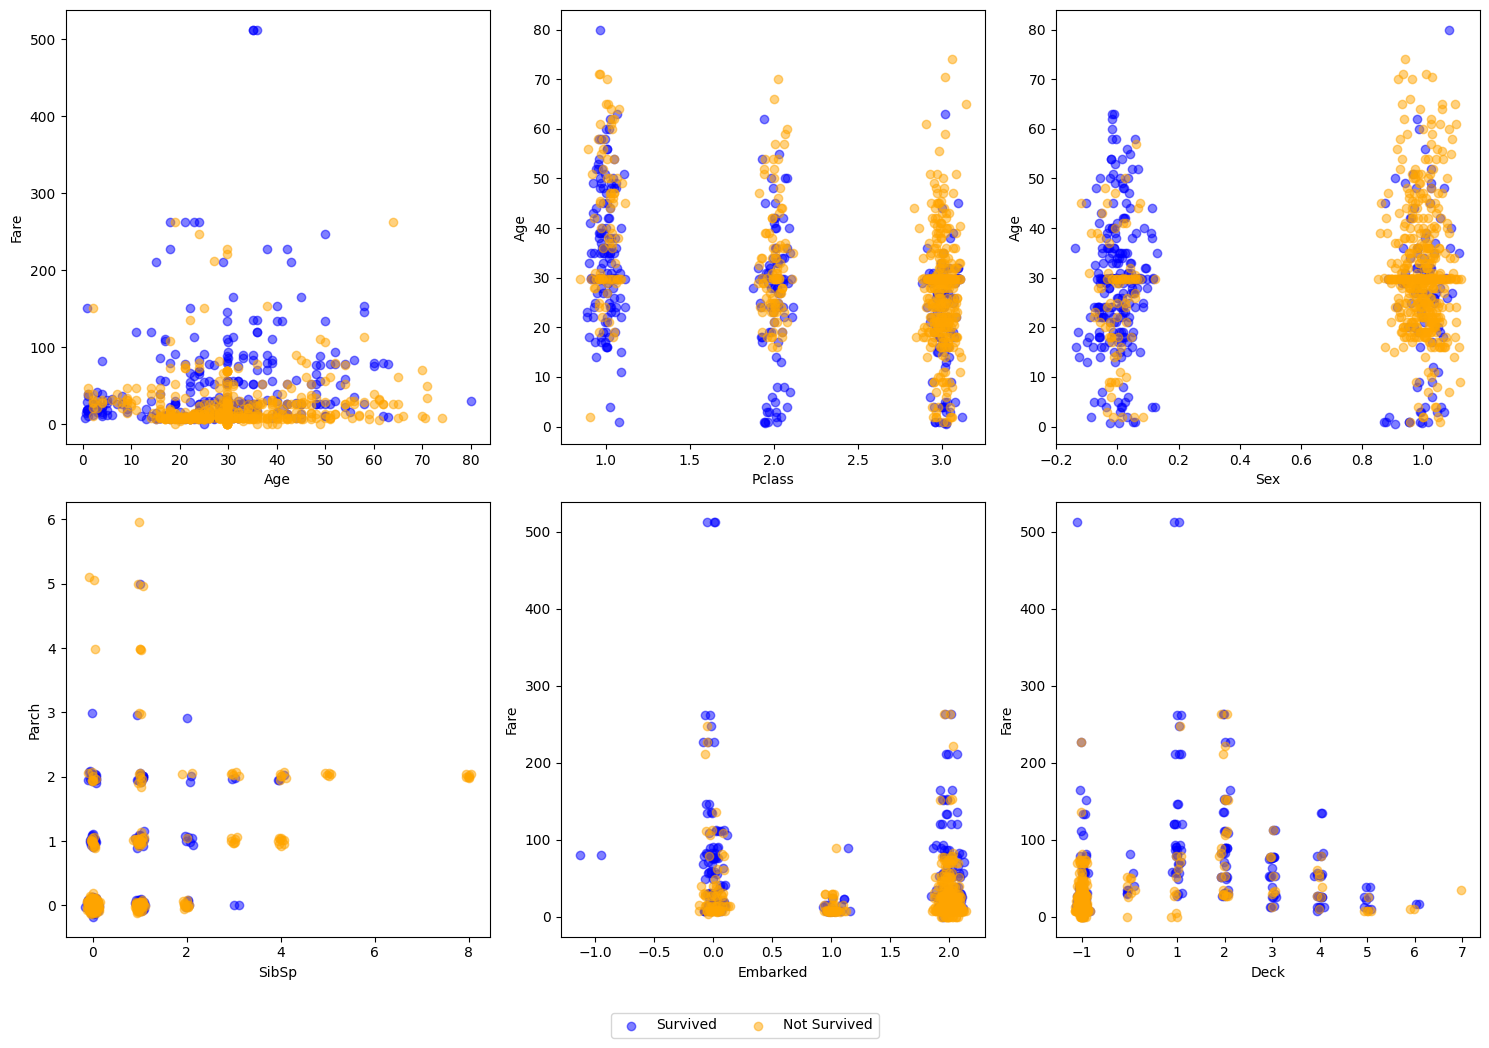

In [21]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.scatter(survivors['Age'], survivors['Fare'], alpha=0.5, color='blue', label='Survived')
plt.scatter(non_survivors['Age'], non_survivors['Fare'], alpha=0.5, color='orange', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.subplot(2, 3, 2)
plt.scatter(survivors['Pclass'] + np.random.normal(0, 0.05, len(survivors)), 
            survivors['Age'], alpha=0.5, color='blue')
plt.scatter(non_survivors['Pclass'] + np.random.normal(0, 0.05, len(non_survivors)),
            non_survivors['Age'], alpha=0.5, color='orange')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.subplot(2, 3, 3)
plt.scatter(survivors['Sex'] + np.random.normal(0, 0.05, len(survivors)),
            survivors['Age'], alpha=0.5, color='blue')
plt.scatter(non_survivors['Sex'] + np.random.normal(0, 0.05, len(non_survivors)),
            non_survivors['Age'], alpha=0.5, color='orange')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.subplot(2, 3, 4)
plt.scatter(survivors['SibSp'] + np.random.normal(0, 0.05, len(survivors)),
            survivors['Parch'] + np.random.normal(0, 0.05, len(survivors)),
            alpha=0.5, color='blue')
plt.scatter(non_survivors['SibSp'] + np.random.normal(0, 0.05, len(non_survivors)),
            non_survivors['Parch'] + np.random.normal(0, 0.05, len(non_survivors)),
            alpha=0.5, color='orange')
plt.xlabel('SibSp')
plt.ylabel('Parch')
plt.subplot(2, 3, 5)
plt.scatter(survivors['Embarked'] + np.random.normal(0, 0.05, len(survivors)),
            survivors['Fare'], alpha=0.5, color='blue')
plt.scatter(non_survivors['Embarked'] + np.random.normal(0, 0.05, len(non_survivors)),
            non_survivors['Fare'], alpha=0.5, color='orange')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.subplot(2, 3, 6)
plt.scatter(survivors['Deck'] + np.random.normal(0, 0.05, len(survivors)),
            survivors['Fare'], alpha=0.5, color='blue')
plt.scatter(non_survivors['Deck'] + np.random.normal(0, 0.05, len(non_survivors)),
            non_survivors['Fare'], alpha=0.5, color='orange')
plt.xlabel('Deck')
plt.ylabel('Fare')
fig.legend(['Survived', 'Not Survived'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

Using mean or mode to fill in missing values has both benefits and drawbacks. 
On the positive side, it keeps all records in the dataset, preserves the overall sample size of analyses. However, it can also introduce bias because the inserted values may not reflect the true underlying data. For example, if missing ages are more common in certain groups with incomplete records, simply replacing them with the overall mean can hide important patterns. Thus, compared to deleting rows with missing data, mean or mode imputation avoids weakening statistical tests, but at the cost of potentially distorting the relationships within the data.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [23]:
from collections import Counter
with open('pos.txt', 'r') as f:
    pos_w = f.read().split()
with open('neg.txt', 'r') as f:
    neg_w = f.read().split()
pos_counter = Counter(pos_w)
neg_counter = Counter(neg_w)
print("most common positive words:", pos_counter.most_common(10))
print("most common negative words:", neg_counter.most_common(10))

most common positive words: [('great', 435906), ('work', 427780), ('use', 345233), ('good', 291448), ('fit', 273505), ('instal', 229408), ('product', 210084), ('look', 181401), ('just', 180420), ('like', 175725)]
most common negative words: [('work', 39998), ('use', 37244), ('fit', 31293), ('product', 24394), ('just', 23580), ('light', 22907), ('like', 20685), ('time', 19665), ('look', 18824), ('instal', 18709)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

with open('pos.txt', 'r') as f:
    pos_text = f.read()
with open('neg.txt', 'r') as f:
    neg_text = f.read()
doc = [pos_text, neg_text]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(doc)
print(tfidf_matrix.shape)
print(vectorizer.get_feature_names_out()[:50])

(2, 235581)
['00' '000' '0000' '00000' '000000' '00000000' '000000000000000000058'
 '000000000000002' '00000000004' '0000001' '00000042' '000001' '00001'
 '00004' '00005' '00005anbspand' '00006' '0000833333' '0000ga' '0001'
 '00011' '00012' '00014' '00015' '00016' '0001632401' '00018' '000182pk'
 '00019' '0002' '00025' '00026' '00026w' '00028' '0003' '00030' '00036'
 '0003c' '0003in' '0004' '000400' '0004000k' '00044' '0004in' '0005'
 '00050010' '00058' '000595' '0006' '00061']


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [ ]:
feature_names = vectorizer.get_feature_names_out()
pos_tfidf = tfidf_matrix[0].toarray()[0]
neg_tfidf = tfidf_matrix[1].toarray()[0]

pos_top = sorted(zip(feature_names, pos_tfidf), key=lambda x: x[1], reverse=True)[:10]
neg_top = sorted(zip(feature_names, neg_tfidf), key=lambda x: x[1], reverse=True)[:10]

print("Top TF/IDF words in positive reviews:")
for word, score in pos_top:
    if score > 0:
        print(f"{word}: {score:.6f}")
print("\nTop TF/IDF words in negative reviews:")
for word, score in neg_top:
    if score > 0:
        print(f"{word}: {score:.6f}")

# The TF-IDF woks as expected, it can find words that are distinctive to positive or negative reviews.

Top TF/IDF words in positive reviews:
great: 0.366786
work: 0.359949
use: 0.290491
good: 0.245234
fit: 0.230137
instal: 0.193032
product: 0.176772
look: 0.152637
just: 0.151812
like: 0.147861

Top TF/IDF words in negative reviews:
work: 0.301803
use: 0.281022
fit: 0.236120
product: 0.184064
just: 0.177922
light: 0.172843
like: 0.156077
time: 0.148381
look: 0.142035
instal: 0.141168


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

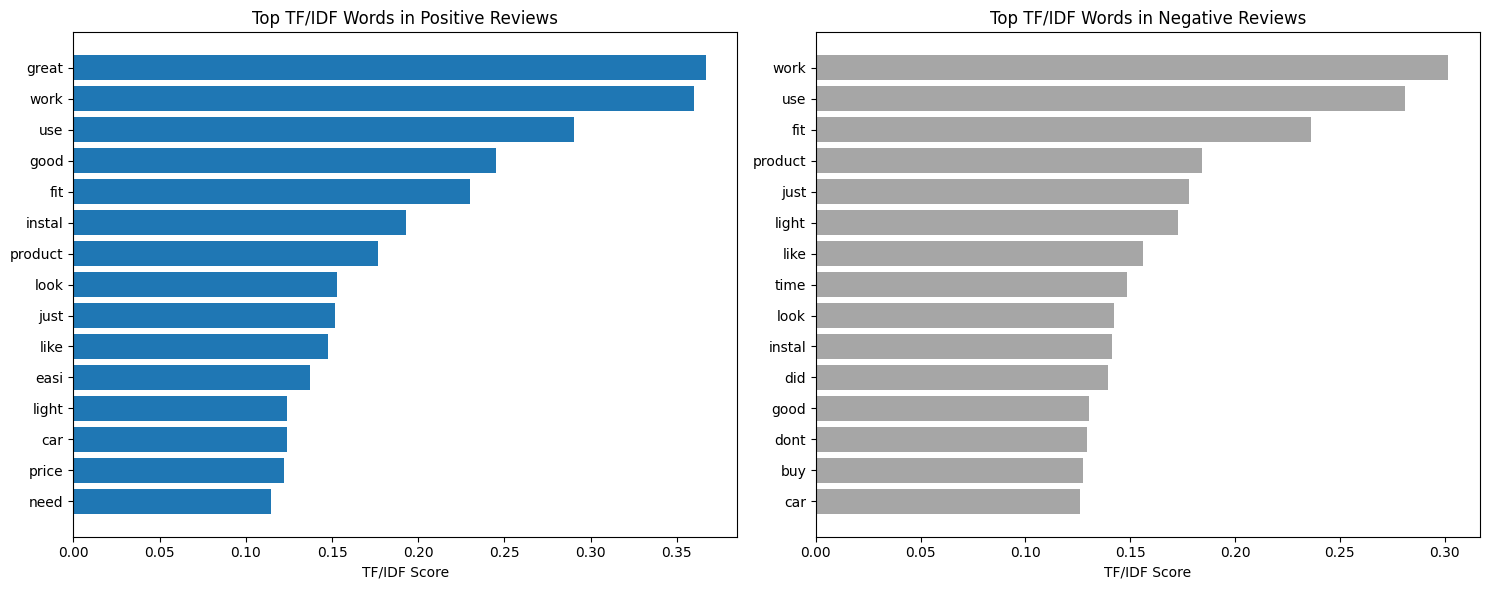

In [31]:
import matplotlib.pyplot as plt
pos_scores = [(word, score) for word, score in zip(feature_names, pos_tfidf) if score > 0]
neg_scores = [(word, score) for word, score in zip(feature_names, neg_tfidf) if score > 0]
pos_scores.sort(key=lambda x: x[1], reverse=True)
neg_scores.sort(key=lambda x: x[1], reverse=True)
top_pos = pos_scores[:15]
top_neg = neg_scores[:15]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
pos_w, pos_s = zip(*top_pos)
plt.barh(range(len(pos_w)), pos_s)
plt.yticks(range(len(pos_w)), pos_w)
plt.xlabel('TF/IDF Score')
plt.title('Top TF/IDF Words in Positive Reviews')
plt.gca().invert_yaxis()
plt.subplot(1, 2, 2)
neg_w, neg_s = zip(*top_neg)
plt.barh(range(len(neg_w)), neg_s, color='grey', alpha=0.7)
plt.yticks(range(len(neg_w)), neg_w)
plt.xlabel('TF/IDF Score')
plt.title('Top TF/IDF Words in Negative Reviews')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**